In [2]:
!pip install keras-tuner -q
import keras_tuner
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Rescaling
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, add, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model, image_dataset_from_directory
from skimage import io
import matplotlib.pyplot as plt, numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [3]:
X_train = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Group_5/train",
    labels="inferred",
    label_mode="categorical",  #converting to one-hot encoding
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=100,
    validation_split=0.15, 
    subset = "training")

X_valid = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Group_5/train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=100,
    validation_split=0.15, 
    subset = "validation")

X_test = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Group_5/test",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=100,)

Found 2150 files belonging to 5 classes.
Using 1828 files for training.
Found 2150 files belonging to 5 classes.
Using 322 files for validation.
Found 250 files belonging to 5 classes.


In [4]:
#toy resnet model

inputs = Input(shape=(64, 64, 3))
x = Rescaling(1./255)(inputs)   #normalising values to be between 0-255 since pictures are rgb
x = Conv2D(64, 3, activation="relu")(inputs)
block_1_output = MaxPooling2D(2)(x)

x = Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = add([x, block_1_output])

x = Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = add([x, block_2_output])

x = Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_4_output = add([x, block_3_output])

x = Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_5_output = add([x, block_4_output])

x = Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_6_output = add([x, block_5_output])

x = GlobalAveragePooling2D()(block_6_output)
x = Dense(250, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation="softmax")(x)

model = Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 31, 64)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 31, 31, 64)   36928       ['max_pooling2d[0][0]']          
                                                                                         

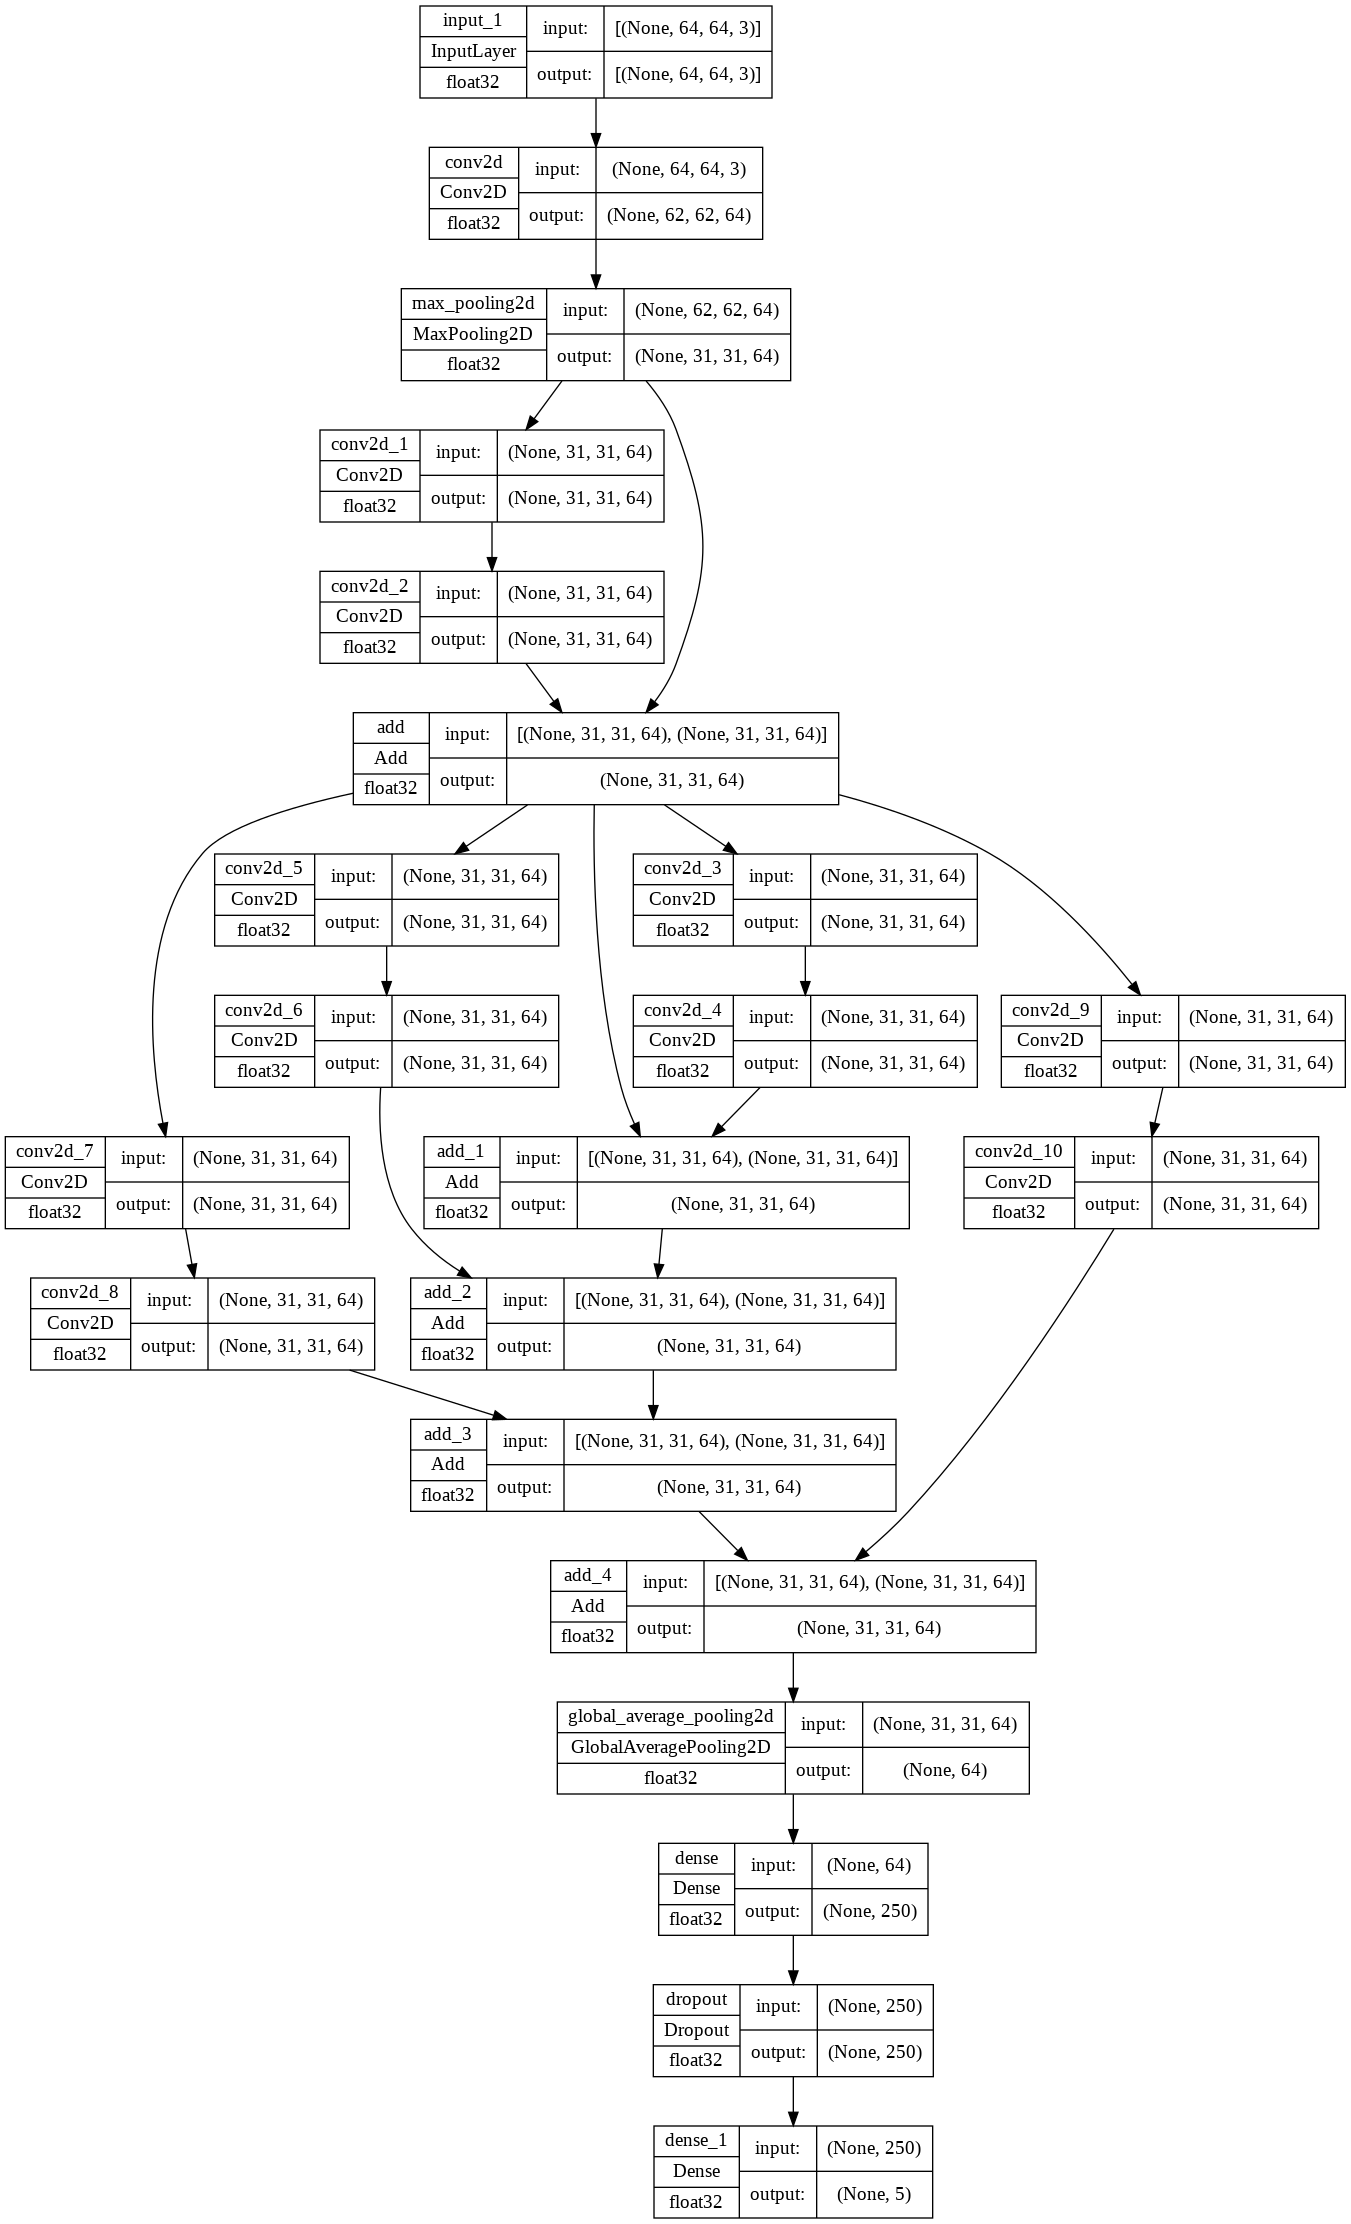

In [5]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [6]:
#couldn't do 50 as it was very time consuming, around 3 hours to complete 30 epochs 
hist = model.fit(X_train, epochs=15, validation_data=X_valid, verbose=1)

Epoch 1/15
58/58 [==============================] - 108s 2s/step - loss: 22.1979 - accuracy: 0.2522 - val_loss: 1.5330 - val_accuracy: 0.2547
Epoch 2/15
58/58 [==============================] - 104s 2s/step - loss: 1.6611 - accuracy: 0.2845 - val_loss: 1.6020 - val_accuracy: 0.2050
Epoch 3/15
58/58 [==============================] - 103s 2s/step - loss: 1.5908 - accuracy: 0.2577 - val_loss: 1.5940 - val_accuracy: 0.2547
Epoch 4/15
58/58 [==============================] - 104s 2s/step - loss: 1.5898 - accuracy: 0.2380 - val_loss: 1.5923 - val_accuracy: 0.2578
Epoch 5/15
58/58 [==============================] - 105s 2s/step - loss: 1.5837 - accuracy: 0.2604 - val_loss: 1.5870 - val_accuracy: 0.2578
Epoch 6/15
58/58 [==============================] - 106s 2s/step - loss: 1.5786 - accuracy: 0.2418 - val_loss: 1.5900 - val_accuracy: 0.2547
Epoch 7/15
58/58 [==============================] - 106s 2s/step - loss: 1.5824 - accuracy: 0.2341 - val_loss: 1.5810 - val_accuracy: 0.2422
Epoch 8/15
5

In [7]:
loss_test, pred_test = model.evaluate(X_test)
print("Testing accuracy (%) =", pred_test*100)

8/8 [==============================] - 4s 413ms/step - loss: 1.5894 - accuracy: 0.2320
Testing accuracy (%) = 23.19999933242798
